# Classificazione con k-NN - Dimmi chi sono i tuoi vicini... 🤝

Nelle lezioni precedenti abbiamo imparato a prevedere **valori numerici** (regressione). Ora affrontiamo un nuovo tipo di problema: come si assegna un dato a una **categoria**?

Questo compito si chiama **Classificazione**. Non vogliamo più sapere "quanto", ma "cosa".
* Questa email è **Spam** o **Non Spam**?
* Questo cliente **Acquisterà** o **Non Acquisterà**?
* La foto ritrae un **Gatto** o un **Cane**?

Inizieremo con uno degli algoritmi più intuitivi per la classificazione: **k-Nearest Neighbors (k-NN)**, ovvero i "k vicini più prossimi".

L'idea di base è riassunta dal detto: **"Dimmi chi sono i tuoi vicini e ti dirò chi sei"**. Per classificare un nuovo elemento, l'algoritmo guarda semplicemente gli **k** elementi più simili (i suoi vicini) nel set di dati di addestramento e gli assegna l'etichetta più comune tra di loro.

Per rendere tutto visivo, useremo un esempio semplice. Vogliamo creare un modello in grado di distinguere tra **mele** e **banane** basandosi su due sole caratteristiche: la loro **larghezza** e la loro **altezza** in centimetri.

* **Mele**: tendono ad essere "tonde", quindi larghezza e altezza sono simili.
* **Banane**: tendono ad essere "allungate", quindi l'altezza è maggiore della larghezza.

Creiamo un piccolo set di dati con le misure di alcuni frutti che abbiamo già etichettato.

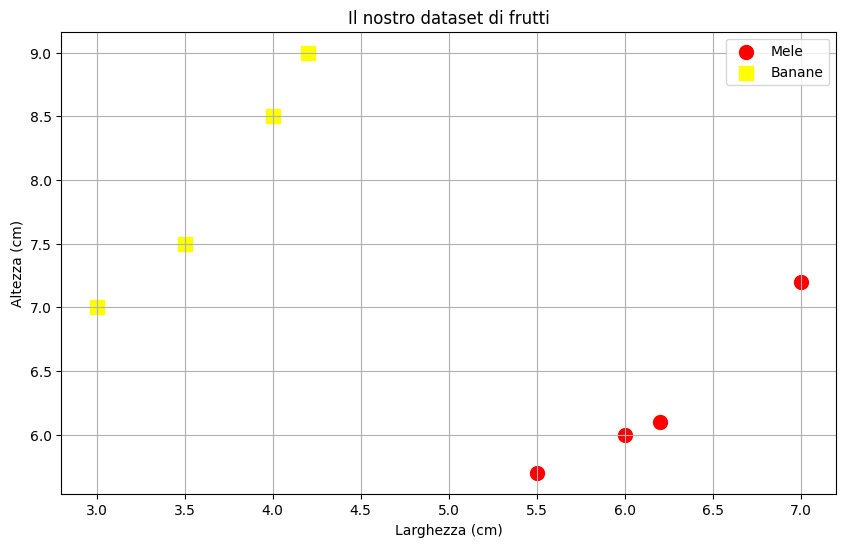

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dati di addestramento: [larghezza, altezza]
# Mele (tendenzialmente tonde)
mele = np.array([
    [6.0, 6.0],
    [5.5, 5.7],
    [6.2, 6.1],
    [7.0, 7.2]
])

# Banane (tendenzialmente allungate)
banane = np.array([
    [3.0, 7.0],
    [3.5, 7.5],
    [4.0, 8.5],
    [4.2, 9.0]
])

# Uniamo i dati in un unico array di features (X) e uno di etichette (y)
# 0 rappresenterà le mele, 1 rappresenterà le banane
X = np.concatenate([mele, banane])
y = np.array([0] * len(mele) + [1] * len(banane)) # [0,0,0,0, 1,1,1,1]

# Visualizziamo i nostri frutti
plt.figure(figsize=(10, 6))
# Disegniamo le mele in rosso
plt.scatter(mele[:, 0], mele[:, 1], c='red', marker='o', s=100, label='Mele')
# Disegniamo le banane in giallo
plt.scatter(banane[:, 0], banane[:, 1], c='yellow', marker='s', s=100, label='Banane')

plt.title('Il nostro dataset di frutti')
plt.xlabel('Larghezza (cm)')
plt.ylabel('Altezza (cm)')
plt.legend()
plt.grid(True)
plt.show()

Come puoi vedere, i due gruppi sono abbastanza distinti. Ora, immaginiamo di avere un **nuovo frutto** di cui non conosciamo l'etichetta.

Le sue misure sono: **larghezza = 5 cm** e **altezza = 8 cm**.

Posizioniamolo sul grafico. Secondo te, a occhio, è più probabile che sia una mela o una banana? L'algoritmo k-NN formalizza proprio questa intuizione.

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Definiamo il numero di vicini da considerare
# Scegliamo k=3: il modello guarderà i 3 vicini più prossimi
k = 3

# 2. Creiamo e addestriamo il modello
# Per k-NN, "addestrare" significa semplicemente memorizzare i dati di training
modello_knn = KNeighborsClassifier(n_neighbors=k)
modello_knn.fit(X, y)

print(f"✅ Modello k-NN (con k={k}) addestrato.")

# 3. Definiamo il nostro frutto misterioso
frutto_misterioso = np.array([[5.0, 8.0]]) # [larghezza, altezza]

# 4. Facciamo la predizione!
predizione = modello_knn.predict(frutto_misterioso)

# Interpretiamo il risultato
if predizione[0] == 0:
    risultato = "Mela 🍎"
else:
    risultato = "Banana 🍌"

print(f"Il modello ha classificato il frutto misterioso come: {risultato}")

✅ Modello k-NN (con k=3) addestrato.
Il modello ha classificato il frutto misterioso come: Banana 🍌


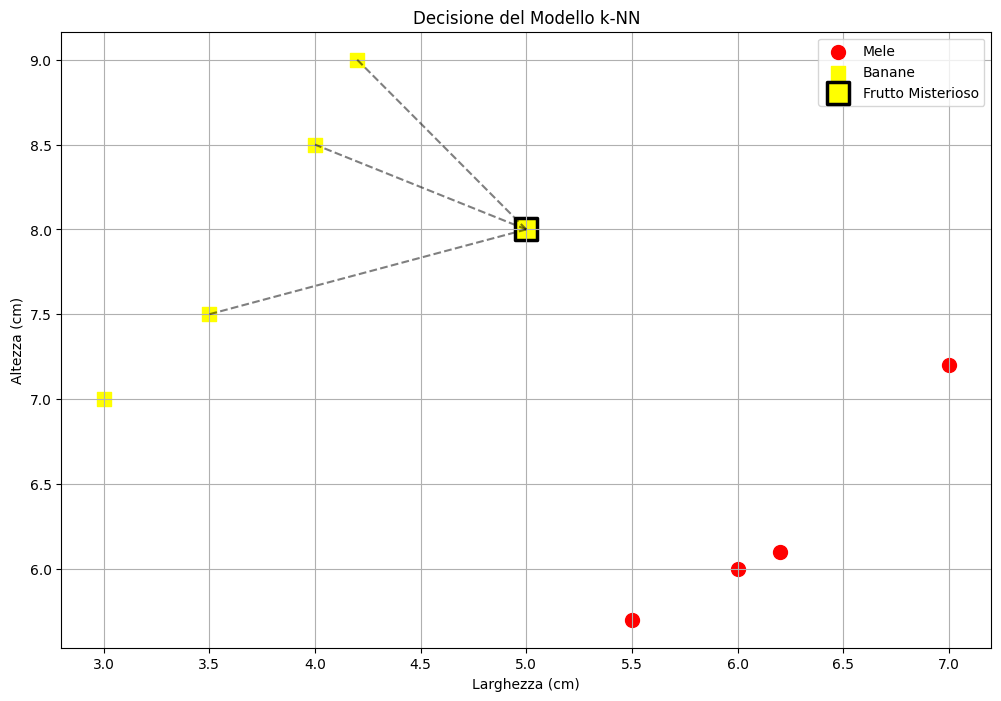

I 3 vicini più prossimi sono a queste coordinate:
[[4.  8.5]
 [4.2 9. ]
 [3.5 7.5]]


In [3]:
# Troviamo i 3 vicini più prossimi che il modello ha usato per decidere
distanze, indici_vicini = modello_knn.kneighbors(frutto_misterioso)
vicini = X[indici_vicini[0]]

# Disegniamo di nuovo tutto il grafico
plt.figure(figsize=(12, 8))
plt.scatter(mele[:, 0], mele[:, 1], c='red', marker='o', s=100, label='Mele')
plt.scatter(banane[:, 0], banane[:, 1], c='yellow', marker='s', s=100, label='Banane')

# Aggiungiamo il frutto misterioso, colorato in base alla predizione
colore_predizione = 'red' if risultato == 'Mela 🍎' else 'yellow'
marker_predizione = 'o' if risultato == 'Mela 🍎' else 's'

plt.scatter(frutto_misterioso[0, 0], frutto_misterioso[0, 1],
            c=colore_predizione, marker=marker_predizione, s=250,
            edgecolor='black', linewidth=2.5, label='Frutto Misterioso')

# Disegniamo le linee verso i vicini per rendere chiara la decisione
for vicino in vicini:
    plt.plot([frutto_misterioso[0, 0], vicino[0]],
             [frutto_misterioso[0, 1], vicino[1]], 'k--', alpha=0.5)

plt.title('Decisione del Modello k-NN')
plt.xlabel('Larghezza (cm)')
plt.ylabel('Altezza (cm)')
plt.legend()
plt.grid(True)
plt.show()

print(f"I 3 vicini più prossimi sono a queste coordinate:\n{vicini}")

Come mostra il grafico, il nostro frutto misterioso si trova in una zona "di confine", ma i suoi 3 vicini più prossimi sono tutte banane. Di conseguenza, il modello ha eseguito una "votazione a maggioranza" e ha classificato il frutto come **banana**.

### Riepilogo

* **k-NN** è un algoritmo di classificazione basato sulla **somiglianza**.
* Non "impara" una regola fissa, ma si basa sulla vicinanza ai dati di addestramento.
* La scelta di **'k'** è importante: un 'k' piccolo rende il modello sensibile al rumore, un 'k' grande può essere più stabile ma meno preciso sui dettagli.

Nella prossima lezione, esploreremo un altro modo per classificare i dati, non basato sulla distanza ma sulla creazione di regole: l'**Albero Decisionale**.

# Lezione 3.1: Quando il k-NN Va in Crisi - L'Importanza della Scala 📏

L'algoritmo k-NN si basa su una misura di "distanza" per trovare i vicini più prossimi. Ma cosa succede se le nostre caratteristiche sono misurate con scale completamente diverse?

**Nuovo Esempio: Rubini vs. Zaffiri**

Immaginiamo di essere dei gemmologi che vogliono classificare delle pietre preziose. Abbiamo due caratteristiche:
* **Peso**: misurato in carati (un numero piccolo, es. da 1 a 10).
* **Purezza**: misurata su una scala interna da 0 a 1000 (un numero grande).

Il problema è che, nel calcolare la distanza, un algoritmo come k-NN sarà completamente **accecato** dai numeri grandi. Una differenza di 50 punti sulla scala della purezza sembrerà enormemente più importante di una differenza di 2 carati nel peso, anche se per un esperto umano entrambe le differenze sono significative.

In pratica, l'algoritmo **ignorerà quasi completamente la caratteristica con la scala più piccola**. Vediamo questo disastro in azione.

Predizione SENZA scaling: Zaffiro 💠


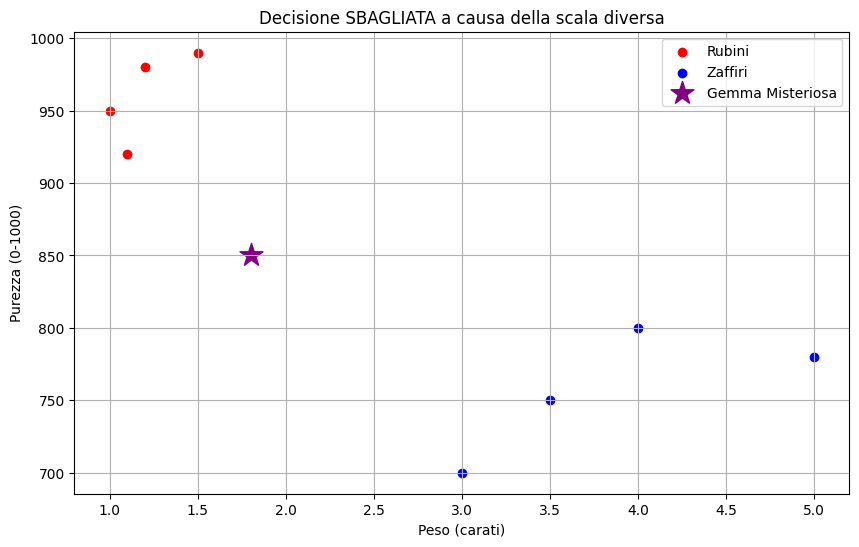

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Dati di addestramento: [peso_in_carati, purezza_su_1000]
# Rubini: poco pesanti, molto puri
rubini = np.array([
    [1.0, 950], [1.2, 980], [1.1, 920], [1.5, 990]
])
# Zaffiri: più pesanti, meno puri
zaffiri = np.array([
    [3.0, 700], [3.5, 750], [4.0, 800], [5.0, 780]
])

X = np.concatenate([rubini, zaffiri])
y = np.array([0] * len(rubini) + [1] * len(zaffiri)) # 0=Rubino, 1=Zaffiro

# Gemma misteriosa: leggera come un rubino, ma con purezza non altissima
gemma_misteriosa = np.array([[1.8, 850]]) # A occhio, è più vicina ai rubini

# --- Applichiamo k-NN sui dati GREZZI ---
modello_non_scalato = KNeighborsClassifier(n_neighbors=3)
modello_non_scalato.fit(X, y)
predizione = modello_non_scalato.predict(gemma_misteriosa)

risultato = "Rubino 💎" if predizione[0] == 0 else "Zaffiro 💠"
print(f"Predizione SENZA scaling: {risultato}")

# --- Visualizzazione ---
plt.figure(figsize=(10, 6))
plt.scatter(rubini[:, 0], rubini[:, 1], c='red', label='Rubini')
plt.scatter(zaffiri[:, 0], zaffiri[:, 1], c='blue', label='Zaffiri')
plt.scatter(gemma_misteriosa[0, 0], gemma_misteriosa[0, 1], c='purple', marker='*', s=300, label='Gemma Misteriosa')
plt.title('Decisione SBAGLIATA a causa della scala diversa')
plt.xlabel('Peso (carati)')
plt.ylabel('Purezza (0-1000)')
plt.legend()
plt.grid(True)
plt.show()

Come previsto, il modello ha sbagliato! Ha classificato la gemma come **Zaffiro**.
Perché? Perché la distanza sull'asse della purezza (l'asse Y) è così grande che ha "schiacciato" l'importanza della distanza sull'asse del peso. La gemma, in termini di "distanza numerica", è più vicina agli zaffiri a causa del valore della purezza.

**La Soluzione: Feature Scaling**
Per risolvere questo problema, dobbiamo mettere tutte le nostre caratteristiche su una **scala comparabile**. Uno dei metodi più comuni è la **Standardizzazione**.

Senza entrare nei dettagli matematici, la standardizzazione trasforma ogni caratteristica in modo che abbia una media di 0 e una deviazione standard di 1. In pratica, converte tutti i valori in "quante deviazioni standard sono lontani dalla media".

È come convertire tutte le valute in Euro prima di confrontare i prezzi: si crea un campo da gioco equo.

Predizione CON lo scaling: Rubino 💎


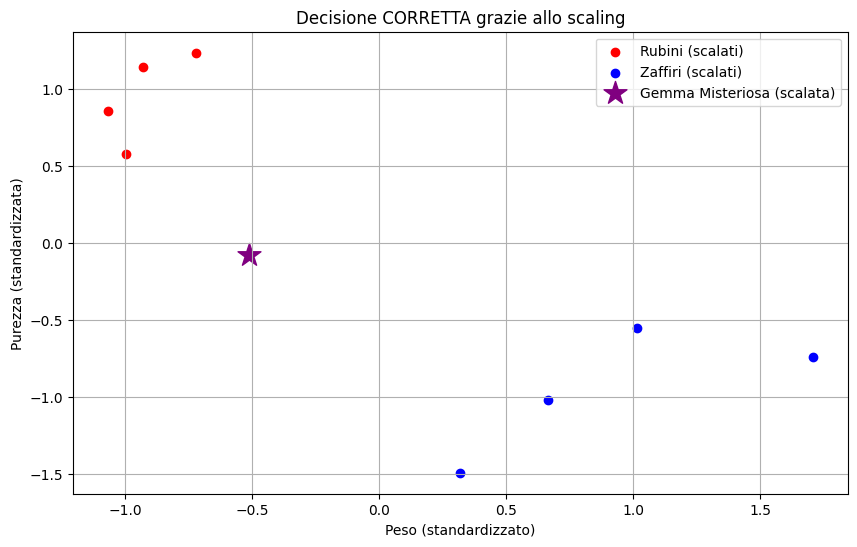

In [5]:
from sklearn.preprocessing import StandardScaler

# 1. Creiamo uno "scaler"
scaler = StandardScaler()

# 2. Lo addestriamo sui nostri dati (impara la media e la deviazione standard di ogni feature)
#    e poi TRASFORMIAMO i dati
X_scalato = scaler.fit_transform(X)

# 3. Trasformiamo ANCHE la nostra gemma misteriosa usando lo STESSO scaler
gemma_misteriosa_scalata = scaler.transform(gemma_misteriosa)


# --- Ora ripetiamo l'addestramento sui dati NUOVI (scalati) ---
modello_scalato = KNeighborsClassifier(n_neighbors=3)
modello_scalato.fit(X_scalato, y)
predizione_scalata = modello_scalato.predict(gemma_misteriosa_scalata)

risultato_scalato = "Rubino 💎" if predizione_scalata[0] == 0 else "Zaffiro 💠"
print(f"Predizione CON lo scaling: {risultato_scalato}")


# --- Visualizzazione dei dati SCALATI ---
plt.figure(figsize=(10, 6))
# I dati ora hanno valori diversi, ma le relazioni tra loro sono preservate
plt.scatter(X_scalato[:4, 0], X_scalato[:4, 1], c='red', label='Rubini (scalati)')
plt.scatter(X_scalato[4:, 0], X_scalato[4:, 1], c='blue', label='Zaffiri (scalati)')
plt.scatter(gemma_misteriosa_scalata[0, 0], gemma_misteriosa_scalata[0, 1], c='purple', marker='*', s=300, label='Gemma Misteriosa (scalata)')

plt.title('Decisione CORRETTA grazie allo scaling')
plt.xlabel('Peso (standardizzato)')
plt.ylabel('Purezza (standardizzata)')
plt.legend()
plt.grid(True)
plt.show()

Questa volta, il modello ha classificato correttamente la gemma come **Rubino**!

Dopo la standardizzazione, entrambe le caratteristiche (peso e purezza) hanno la stessa importanza nel calcolo della distanza. Ora il modello può "vedere" che, in termini relativi, la gemma misteriosa è molto più simile ai rubini.

### Lezione da Ricordare
Per algoritmi basati sulla distanza come **k-NN**, ma anche per molti altri modelli di Machine Learning, lo **scaling delle feature non è un optional: è un passaggio fondamentale** della preparazione dei dati.

Se le tue feature hanno unità di misura o range di valori molto diversi, devi quasi sempre applicare una qualche forma di scaling per garantire che il modello funzioni correttamente.